<a href="https://colab.research.google.com/github/EmilyCY/CIFAR10-Image-Classification/blob/Kman/Pytorch_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch version (incomplete)

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import torch
import torchvision

In [2]:
#set matplotlib to inline
%matplotlib inline

In [3]:
#do we want to use PCIKLE to load the data??
#def unpickle(file):
    #import pickle
   # with open(file, 'rb') as fo:
        #dict = pickle.load(fo, encoding='bytes')
    #return dict

The file has 60000 rows, each row contains a single index into the tiny db,
where the first image in the tiny db is indexed "1". "0" stands for an image that is not from the tiny db.
The first 50000 lines correspond to the training set, and the last 10000 lines correspond
to the test set.

In [4]:
import torch
import torchvision
import torchvision.transforms as transforms

Process: Import dataset
Transform images to RGB matrices of 3x32x32.

Data partitioning into 50k training and 10k test sets

Via SubsetRandomSampler, the dataset is shuffled once again into an iterative object.

Via DataLoader, the randomly shuffled indexes paired with corresponding image matrices, in preset batches decided by batchSize.

Modify the nn.linear function by editing the class nn.model, and making it so that nn.linear automatically flattens a matrix before entering it in nn.linear

Inputting the number of classes (X's rows) and number of features (X's columns) into nn.linear gives us a model, and empty set of thetas to multiply something by.

By iterating through our trainLoader, which contains both the image matrix and the labels, we can input the image matrices through our model to get our outputs.

In [5]:
# import the training set (first 50,000 imgs) by setting train=True.
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,download=True)
# import the test set (10,000 imgs) by setting train=False
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True)
# define the ten labels manually.
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [6]:
#check the data is loaded correctly
#data sholuld be loaded as a tuple
print("This is the length of the trainset: ",len(trainset))
print("This is the length of the testset: ",len(testset))

This is the length of the trainset:  50000
This is the length of the testset:  10000


In [7]:
print(trainset)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train


In [8]:
print(testset)

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./data
    Split: Test


#Look at some of the images downloaded

this is an image of a plane


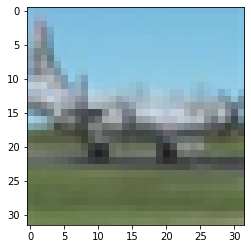

In [9]:
example = 1999
image, label = trainset[example] #since each element of the trainset list is itself a tuple with the image details, and then the label
print("this is an image of a " + classes[(trainset[example])[1]]) # first index into tuple in trainset, then the 2nd value (label), and then the classes
plt.imshow(image)

In [10]:
#Examine the format it is supplied in
#Image is supplied as PIL
print(trainset[100])

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7FBD46D91E50>, 8)


# Transforming images into matrices of color values

This transforms the image into a matrices of colours for each pixel

In [11]:
#transform images into RGB
import torchvision.transforms as transforms

In [68]:
datasetT = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transforms.ToTensor())
print(datasetT)

Files already downloaded and verified
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [13]:
#Examine the format it is supplied in
#Image is supplied as PIL
#QUESITON: why is this the same as prior to transform? Check how it was loaded. Did this occur in the loading stage?
print(trainset[100])

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7FBD45A73CD0>, 8)


In [14]:
#This is how to show the shape!!
imgTensor, label = datasetT[example]
print('size of image matrix: ' + str(imgTensor.shape))
print("this is an image of a " + classes[(trainset[example])[1]])

size of image matrix: torch.Size([3, 32, 32])
this is an image of a plane


In [15]:
#Look at the pixel values for the bottom 4 pixels (2x2)
print(imgTensor[:, 0:2, 0:2])

tensor([[[0.4863, 0.4941],
         [0.5255, 0.5647]],

        [[0.7451, 0.7255],
         [0.7412, 0.6863]],

        [[0.8824, 0.8431],
         [0.8784, 0.8078]]])


R channel of image 0 in dataset


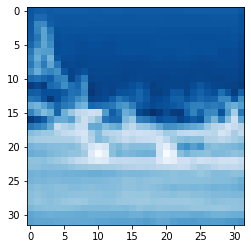

In [51]:
#Plot the image from the imgTensor values
#limit the colours to Blues
imgTensor, label = datasetT[example]
plt.imshow(imgTensor[1, 0:64, 0:64], cmap='Blues')
# change the 0 to 1 or 2 for different color channels.
print("R channel of image 0 in dataset")

R channel of image 0 in dataset


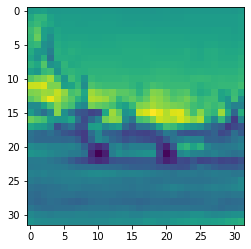

In [59]:
#Plot the image from the imgTensor values
#limit the colours to Blues
imgTensor, label = datasetT[example]
plt.imshow(imgTensor[0, 0:3072, 0:3072])
# change the 0 to 1 or 2 for different color channels.
print("R channel of image 0 in dataset")

R channel of image 0 in dataset


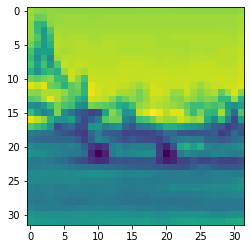

In [60]:
#Plot the image from the imgTensor values
#limit the colours to Blues
imgTensor, label = datasetT[example]
plt.imshow(imgTensor[1, 0:3072, 0:3072])
# change the 0 to 1 or 2 for different color channels.
print("R channel of image 0 in dataset")

R channel of image 0 in dataset


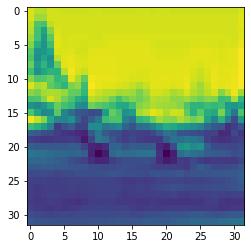

In [63]:
#Plot the image from the imgTensor values
#no colour limitation
imgTensor, label = datasetT[example]
plt.imshow(imgTensor[2, 0:128, 0:128])
# change the 0 to 1 or 2 for different color channels.
print("R channel of image 0 in dataset")

# Splitting the data

Introduce a training set plus a cross-validation set to check for over/underfitting

In [18]:
#length of training examples.
m = 50000 

#percentage of m dedicated to CV.  
pCV = 0.2

# give the amount of examples dedicated to CV. 
mCV = int(m*pCV)
print("amount of training examples: " + str(m - mCV))
print("amount of cross validation examples: " + str(mCV))

amount of training examples: 40000
amount of cross validation examples: 10000


In [19]:
#This creates a function to randomly create the training and cross-validation sets according to the % split you want
#This could also be done using a pytorch Sampler
def splitIndices(m, pCV):
  """ randomly shuffle a training set's indices, then split the indices into training and cross validation sets.
   Pass in 'm', length of training set, and 'pCV', the percentage of the training set you would like 
   to dedicate to cross validation."""
   
  # determine size of CV set.
  mCV = int(m*pCV)

  #create random permutation of 0 to m-1 - randomly shuffle all values from 0 to m.
  indices = np.random.permutation(m)

  #pick first mCV indices for training, and then validation.
  return indices[mCV:], indices[:mCV]

In [20]:
#create the two sets
trainIndices, valIndices = splitIndices(m, pCV)

In [21]:
# print the first few indices of the training set, and first few of the validation set, as a sanity check to see that they are shuffled.
print("length of training set: " + str(len(trainIndices)))
print("length of cross validation set: " + str(len(valIndices)))
print()
print('sample validation indices: ' + str(list(valIndices[0:8])))
print('sample educational indices: ' + str(list(trainIndices[0:8])))

length of training set: 40000
length of cross validation set: 10000

sample validation indices: [39384, 11290, 23661, 38736, 23572, 16407, 33747, 13987]
sample educational indices: [4041, 11666, 37584, 2349, 28477, 11533, 26980, 48812]


Internal library method (random split) to split into Train and Validate sets

In [69]:
#ALTERNATE CODE from Pytorch 
# PRESET CODE -- OPTIMIZED PYTORCH IMPLEMENTATION
from torch.utils.data import random_split

train_ds, val_ds = random_split(datasetT, [40000, 10000])
len(train_ds), len(val_ds)

(40000, 10000)

Next, we load the indices into groups for later stochastic gradient descent, as well as ease of programming, since these are quite large matrices.

In [23]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

What this below does is create a sampler object with SubsetRandomSampler, which creates an endlessly iterable 'list' of shuffled indices from trainIndices (just a list of arbitrary numbers).

Then, in trainLoader, say if batch size = 2, 2 images (color value matrices) will be processed from datasetT using the first two indices in trainSampler. This means that there will be two sets of three 32x32 matrices, which reflects the nature that the entire dimensions of the X is technically 50000x3x32x32 (or if our batch size is say 100, 100x3x32x32 for each batch)

In [24]:
batchSize = 100

# TRAIN SET

# training sampler and data loader - creates a SubsetRandomSampler object that takes random samples of the numbers in trainIndices, or random indices.
trainSampler = SubsetRandomSampler(trainIndices)


# training loader - creates a dataloader object which takes the indices from trainSampler, 
# and when given batchSize, takes random batches of batchSize from the indices list, and then pairs it with
# the respective dataset in datasetT
trainLoader = DataLoader(datasetT, batchSize, sampler=trainSampler)

print(list(trainLoader))

# VALIDATION SET

valSampler = SubsetRandomSampler(valIndices)
valLoader = DataLoader(datasetT, batchSize, sampler=valSampler)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# Convert to correct shape

In [25]:
import torch.nn as nn

# this will dictate the rows of the theta matrix
inputSize = 3*32*32

# this will dictate the columns of the theta matrix
numClasses = 10

# create our linear regression model (nn.Linear creates bias terms for us)
model = nn.Linear(inputSize, numClasses)

In [26]:
class CIFAR10(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(inputSize, numClasses)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 3072)
        out = self.linear(xb)
        return out
    
model = CIFAR10()

In [30]:
#check the shape
print(model.linear.weight.shape)
print(model.linear.bias.shape)

torch.Size([10, 3072])
torch.Size([10])


In [31]:
for images, labels in trainLoader:
  outputs = model(images)
  break

print('outputs.shape :', outputs.shape)

print('sample outputs :\n', outputs[:2]) # print 2 out of the 100 rows of the total output vector

outputs.shape : torch.Size([100, 10])
sample outputs :
 tensor([[-0.2107,  0.0328, -0.1374, -0.2890,  0.2296, -0.1016,  0.2487, -0.1453,
         -0.1417,  0.5365],
        [ 0.0566, -0.5749,  0.0190, -0.7939,  0.3332,  0.0216, -0.1197, -0.1276,
         -0.1144,  0.4933]], grad_fn=<SliceBackward0>)


In [32]:
#torch.nn.functional is an internal layer which can be connected to other layers 
import torch.nn.functional as F

In [34]:
#specify the dimensiont hat SoftMax will be applied to
# apply the softmax for each output row in our 100 x 10 output (with batch size 100)
probs = F.softmax(outputs, dim=1)

# look at some sample probabilities
print("sample probabilities:\n", probs[:2].data)
# add up the probabilities of each row for a sanity check that they equal 1 now
print(sum(list(probs[0])))

sample probabilities:
 tensor([[0.0783, 0.0998, 0.0842, 0.0724, 0.1215, 0.0873, 0.1239, 0.0835, 0.0839,
         0.1652],
        [0.1079, 0.0574, 0.1039, 0.0461, 0.1423, 0.1042, 0.0905, 0.0898, 0.0910,
         0.1670]])
tensor(1., grad_fn=<AddBackward0>)


In [35]:
maxProbs, preds = torch.max(probs, dim=1) #torch.max returns the max value itself (maxProbs) as well as the index of the prediction (preds)
print(preds)
print(maxProbs)

tensor([9, 9, 9, 9, 9, 9, 9, 9, 4, 9, 9, 9, 9, 9, 0, 9, 9, 9, 9, 9, 9, 9, 4, 9,
        9, 9, 9, 9, 9, 9, 4, 9, 9, 4, 2, 9, 9, 9, 9, 9, 9, 0, 9, 9, 2, 9, 9, 9,
        2, 9, 9, 9, 9, 9, 9, 9, 2, 9, 9, 2, 9, 9, 0, 9, 9, 9, 9, 9, 9, 9, 9, 4,
        9, 9, 9, 9, 9, 9, 9, 9, 4, 9, 9, 9, 4, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 0, 9, 9])
tensor([0.1652, 0.1670, 0.1490, 0.1799, 0.1379, 0.1677, 0.1265, 0.1574, 0.1544,
        0.1828, 0.1427, 0.1486, 0.1614, 0.1488, 0.1446, 0.1389, 0.1314, 0.1949,
        0.1402, 0.1532, 0.2052, 0.1562, 0.1336, 0.1603, 0.1501, 0.1399, 0.1445,
        0.1277, 0.1483, 0.1703, 0.1638, 0.1768, 0.1523, 0.1528, 0.1347, 0.1809,
        0.1849, 0.1720, 0.1425, 0.1958, 0.1276, 0.1475, 0.1867, 0.1735, 0.1346,
        0.1469, 0.1590, 0.1785, 0.1355, 0.2063, 0.1371, 0.1782, 0.1555, 0.1531,
        0.1663, 0.1629, 0.1310, 0.1404, 0.1697, 0.1170, 0.1535, 0.1652, 0.1452,
        0.1641, 0.1578, 0.1387, 0.1519, 0.1677, 0.1549, 0.1421, 0.1628, 0.1402,
        0.2203, 0.1

# Evaluation and Cost function

In [36]:
labels==preds

tensor([False, False, False, False, False, False, False,  True, False, False,
        False, False, False,  True, False,  True, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False,  True, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False,  True,  True, False, False, False, False, False,
        False, False, False,  True,  True, False, False, False, False, False,
        False, False, False, False, False,  True, False,  True, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False])

In [37]:

def accuracy(preds, labels):
  return torch.sum(labels==preds).item() / len(labels)

In [39]:
#use stochastic gradient descent to update our algorithm. Choose a slightly larger learningRate, a hyperparameter, than last time.
learningRate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

# Training the model

In [40]:
# recall that xb is the X (a list batchSize long of 3x32x32 images) for a batch. yb is the corresponding labels for those images.

def lossBatch(model, lossFn, xb, yb, opt=None, metric=None):
  # calculate the loss
  preds = model(xb)
  loss = lossFn(preds, yb)

  if opt is not None:
    # compute gradients
    loss.backward()
    # update parameters
    opt.step()
    # reset gradients to 0 (don't want to calculate second derivatives!)
    opt.zero_grad()

  metricResult = None
  if metric is not None:
    metricResult = metric(preds, yb)

  return loss.item(), len(xb),  metricResult

In [44]:
def evaluate(model, lossFn, validDL, metric=None):
  #with torch.no_grad (this was causing an error)
  
  # pass each batch of the validation set through the model to form a multidimensional list (holding loss, length and metric for each batch)
  # the reason why we made optimization optional is so we can reuse the function here
  results = [lossBatch(model, lossFn, xb, yb, metric=metric,) for xb,yb in validDL]

  # separate losses, counts and metrics
  losses, nums, metrics = zip(*results)

  # total size of the dataset (we keep track of lengths of batches since dataset might not be perfectly divisible by batch size)
  total = np.sum(nums)

  # find average total loss over all batches in validation (remember these are all vectors doing element wise operations.)
  avgLoss = np.sum(np.multiply(losses, nums))/total

  # if there is a metric passed, compute the average metric
  if metric is not None:
    # avg of metric accross batches
    avgMetric = np.sum(np.multiply(metrics, nums)) / total

  return avgLoss, total, avgMetric

In [42]:
def accuracy(outputs, labels):
  _, preds = torch.max(outputs, dim=1) # underscore discards the max value itself, we don't care about that
  return torch.sum(preds == labels).item() / len(preds)

In [45]:
E = evaluate(model, lossFn, valLoader, metric=accuracy)

print("training set loss: ", loss)
print("cross validation set loss: ", E[0])

NameError: ignored

Recap

First, we load our CIFAR-10 dataset.

Then, we upload images in batches of 100 at a time.

Then, we convert our images into 3x32x32 tensors. This makes our batch matrix 100 x 3 x 32 x 32 in dimensions.

Then, we pass each batch into the CIFAR10 model, which converts the tensors from 100 x 3 x 32 x 32 to 100 x 3072.

Then, we multiply it by the weights matrix, which is [10 x 3072], which is transposed to be multiplied by each tensor batch
This multiplication gives a 100 x 10 results matrix, with logits, and we add the bias.

Then, softmax is applied on the logits to convert them into probabilities.

Then, cross entropy is performed on the probabilites matrix to give a continuous and differentiable cost function.

Then, cross entropy from all the different batches is combined to give a total training loss.

Then we calculate the partial derivatives of this cross entropy function with respect to every one of the 10x3072 weights and biases.

Then, we subtract the gradient (the vector of all 10x3072 partial derivatives) from the vector of current thetas, for each batch. (so, youre subtracting from theta 100 times).

We do step 11 for each number of epochs.

In [46]:
# redefine model and optimizer
learningRate = 0.009
model = CIFAR10()
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [47]:
trainList = fit(100, model, lossFn, optimizer, trainLoader, valLoader, metric=accuracy)

NameError: ignored

In [48]:
test = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=torchvision.transforms.ToTensor())

Files already downloaded and verified


In [49]:
testLoader = DataLoader(test, batchSize)

In [50]:
avgLoss, total, avgMetric = evaluate(model, F.cross_entropy, testLoader, metric=accuracy)
print("test set accuracy: \n", avgMetric)
avgLoss, total, avgMetric = evaluate(model, F.cross_entropy, valLoader, metric=accuracy)
print("cross validation set accuracy: \n",avgMetric)
avgLoss, total, avgMetric = evaluate(model, F.cross_entropy, trainLoader, metric=accuracy)
print("training set accuracy: \n",avgMetric)

test set accuracy: 
 0.0705
cross validation set accuracy: 
 0.0707
training set accuracy: 
 0.0691
